In [1]:
# Importing the necessary modules and the dataset
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('figure', dpi=120)

import urllib.request

## 1. Data preparation
### 1.1 Load Data

In [2]:

# Define the URL where the data is hosted
url = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes_scale"
#url = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes"

# Define the local file name where you want to save the downloaded data
filename = "diabetes_scale.txt"

# Use urllib.request.urlretrieve to download the data from the URL and save it locally
urllib.request.urlretrieve(url, filename)

# Now, you can work with the downloaded file
# In this case, you're reading its content and storing it in the "content" variable
with open(filename, "r") as file:
    content = file.read()

# Print the content of the downloaded file
print(content)

-1 1:-0.294118 2:0.487437 3:0.180328 4:-0.292929 5:-1 6:0.00149028 7:-0.53117 8:-0.0333333 
+1 1:-0.882353 2:-0.145729 3:0.0819672 4:-0.414141 5:-1 6:-0.207153 7:-0.766866 8:-0.666667 
-1 1:-0.0588235 2:0.839196 3:0.0491803 4:-1 5:-1 6:-0.305514 7:-0.492741 8:-0.633333 
+1 1:-0.882353 2:-0.105528 3:0.0819672 4:-0.535354 5:-0.777778 6:-0.162444 7:-0.923997 8:-1 
-1 1:-1 2:0.376884 3:-0.344262 4:-0.292929 5:-0.602837 6:0.28465 7:0.887276 8:-0.6 
+1 1:-0.411765 2:0.165829 3:0.213115 4:-1 5:-1 6:-0.23696 7:-0.894962 8:-0.7 
-1 1:-0.647059 2:-0.21608 3:-0.180328 4:-0.353535 5:-0.791962 6:-0.0760059 7:-0.854825 8:-0.833333 
+1 1:0.176471 2:0.155779 3:-1 4:-1 5:-1 6:0.052161 7:-0.952178 8:-0.733333 
-1 1:-0.764706 2:0.979899 3:0.147541 4:-0.0909091 5:0.283688 6:-0.0909091 7:-0.931682 8:0.0666667 
-1 1:-0.0588235 2:0.256281 3:0.57377 4:-1 5:-1 6:-1 7:-0.868488 8:0.1 
+1 1:-0.529412 2:0.105528 3:0.508197 4:-1 5:-1 6:0.120715 7:-0.903501 8:-0.7 
-1 1:0.176471 2:0.688442 3:0.213115 4:-1 5:-1 6:0.

In [3]:
import pandas as pd

# Define the column names
columns = ["Outcome", "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Create an empty list to store the data
data = []

# Open the file and read its lines
with open("diabetes_scale.txt", "r") as file:
    for line in file:
        # Split each line by spaces
        values = line.strip().split(" ")

        # The first value is the outcome (target)
        outcome = int(values[0])

        # The remaining values are feature-value pairs
        features = [0.0] * (len(columns) - 1)  # Subtract 1 to account for the outcome column
        for pair in values[1:]:
            feature_number, feature_value = pair.split(":")
            feature_number = int(feature_number)
            feature_value = float(feature_value)
            features[feature_number - 1] = feature_value  # Subtract 1 to adjust for 0-based indexing

        # Combine the outcome and features into a row
        row = [outcome] + features
        data.append(row)

# Create a pandas DataFrame from the processed data
diabetes = pd.DataFrame(data, columns=columns)


# Display the first few rows of the DataFrame
print(diabetes.head())

   Outcome  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0       -1    -0.294118  0.487437       0.180328      -0.292929 -1.000000   
1        1    -0.882353 -0.145729       0.081967      -0.414141 -1.000000   
2       -1    -0.058824  0.839196       0.049180      -1.000000 -1.000000   
3        1    -0.882353 -0.105528       0.081967      -0.535354 -0.777778   
4       -1    -1.000000  0.376884      -0.344262      -0.292929 -0.602837   

        BMI  DiabetesPedigreeFunction       Age  
0  0.001490                 -0.531170 -0.033333  
1 -0.207153                 -0.766866 -0.666667  
2 -0.305514                 -0.492741 -0.633333  
3 -0.162444                 -0.923997 -1.000000  
4  0.284650                  0.887276 -0.600000  


### 1.2 Check for null and missing value

In [4]:
# Get information about the dataset, such as data types and missing values
print(diabetes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Outcome                   768 non-null    int64  
 1   Pregnancies               768 non-null    float64
 2   Glucose                   768 non-null    float64
 3   BloodPressure             768 non-null    float64
 4   SkinThickness             768 non-null    float64
 5   Insulin                   768 non-null    float64
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB
None


In [5]:
diabetes.describe()   

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.302083,-0.547641,0.215020,0.132877,-0.585122,-0.811349,-0.046421,-0.663641,-0.591971
std,0.953903,0.396421,0.321333,0.317308,0.322267,0.272444,0.234997,0.282945,0.392008
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-0.882353,-0.005025,0.016393,-1.000000,-1.000000,-0.186289,-0.858455,-0.900000
50%,1.000000,-0.647059,0.175879,0.180328,-0.535354,-0.927896,-0.046200,-0.748506,-0.733333
75%,1.000000,-0.294118,0.409547,0.311475,-0.353535,-0.699173,0.090909,-0.531811,-0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


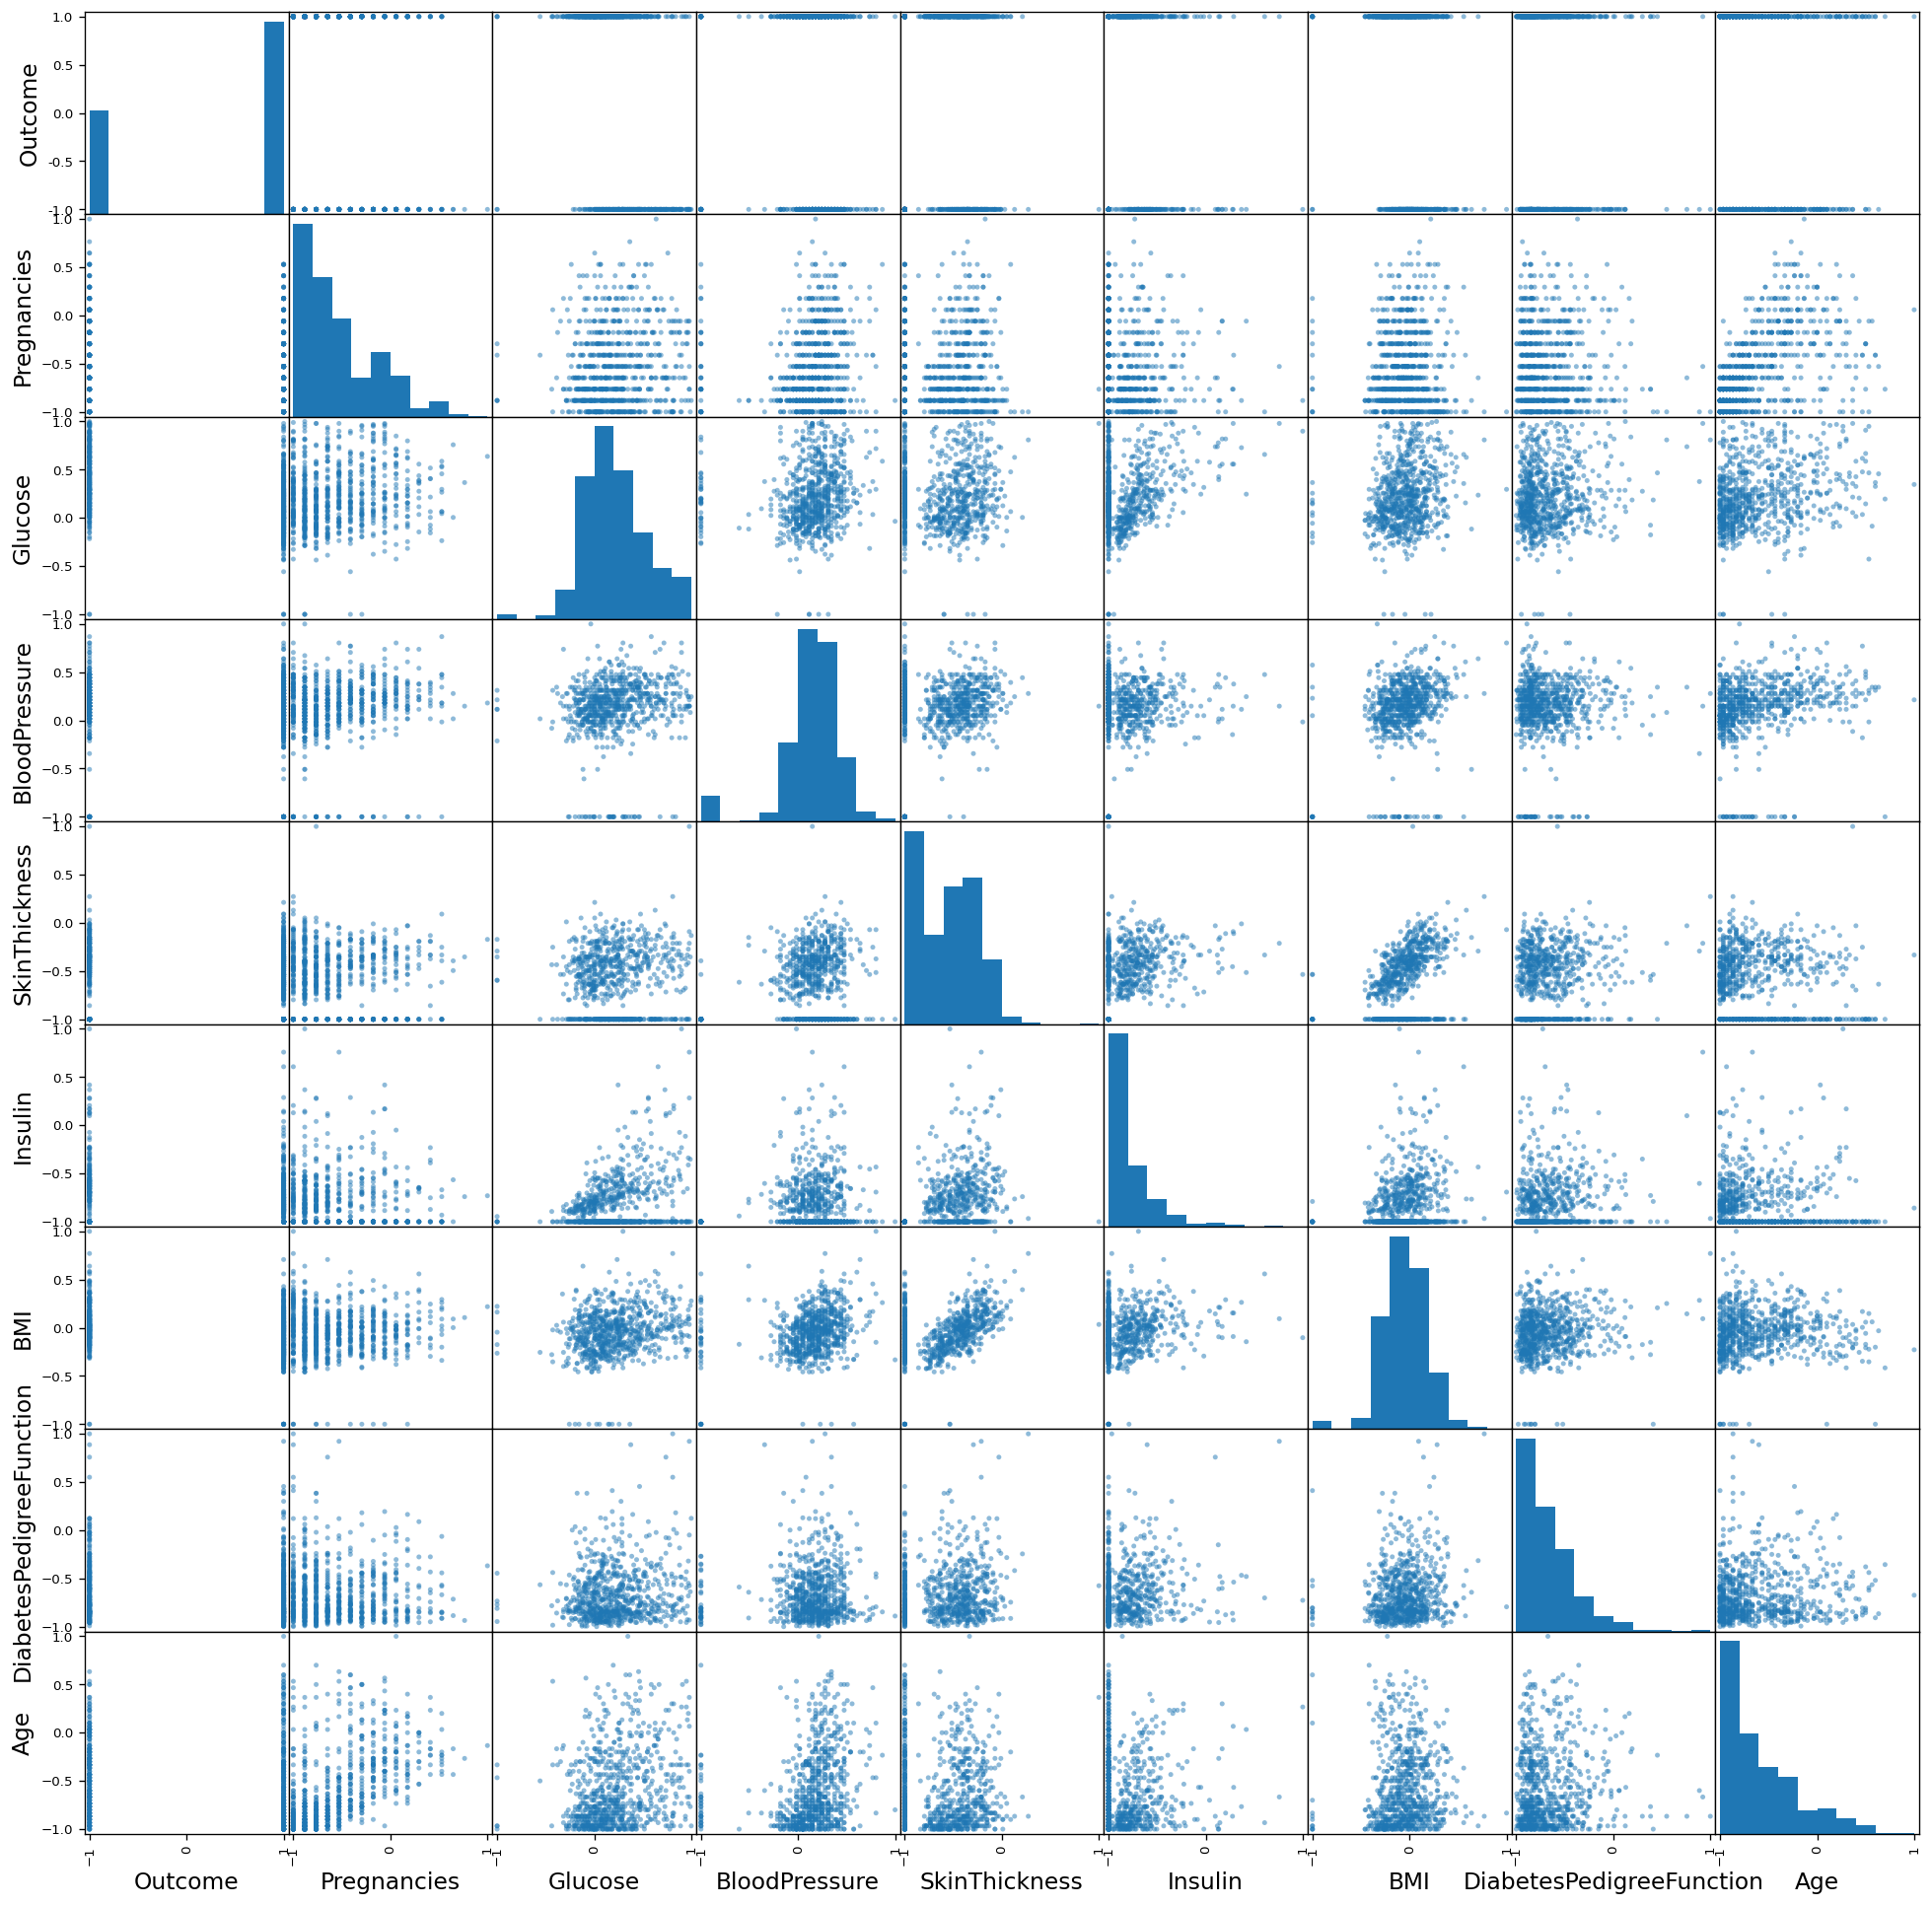

In [6]:
from pandas.plotting import scatter_matrix

scatter_matrix(diabetes, alpha=0.5, figsize=(20, 20))
plt.show()

### 1.3 Spliting traning and valdiation set

In [7]:
# Split the dataset into training, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(diabetes.drop('Outcome', axis=1), diabetes['Outcome'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

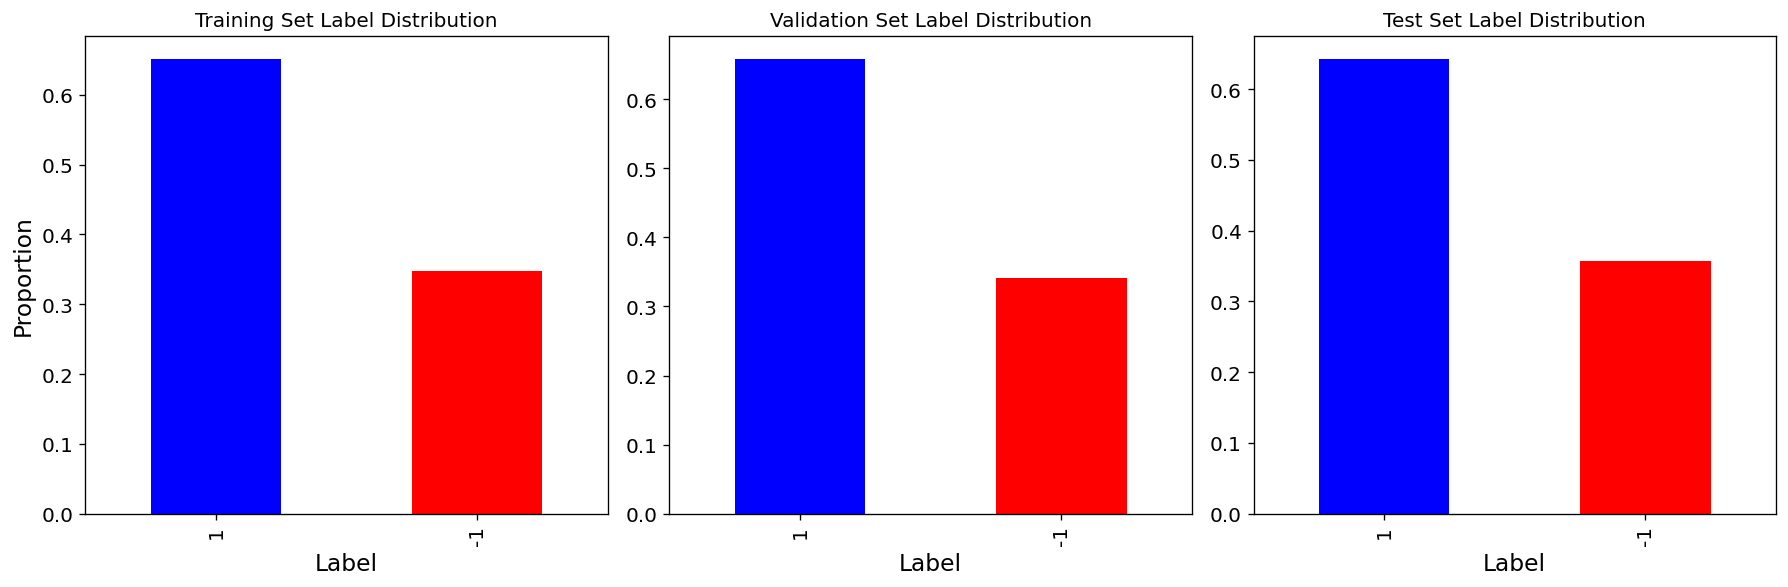

In [8]:
import matplotlib.pyplot as plt

# Calculate label distributions
train_counts = y_train.value_counts(normalize=True)
val_counts = y_val.value_counts(normalize=True)
test_counts = y_test.value_counts(normalize=True)

# Set up the plot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot training set distribution
train_counts.plot(kind='bar', ax=ax[0], color=['blue', 'red'])
ax[0].set_title('Training Set Label Distribution')
ax[0].set_ylabel('Proportion')
ax[0].set_xlabel('Label')

# Plot validation set distribution
val_counts.plot(kind='bar', ax=ax[1], color=['blue', 'red'])
ax[1].set_title('Validation Set Label Distribution')
ax[1].set_xlabel('Label')

# Plot test set distribution
test_counts.plot(kind='bar', ax=ax[2], color=['blue', 'red'])
ax[2].set_title('Test Set Label Distribution')
ax[2].set_xlabel('Label')

# Display the plots
plt.tight_layout()
plt.show()

## 2. Perceptron
### 2.1 Define the model

In [244]:
import numpy as np

class MLP:
    def __init__(self, learning_rate=0.1, n_epochs=100, n_hidden=32, dropout_rate=0.7, l2_lambda=0.01, activation_function='sigmoid', seed=42):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.n_hidden = n_hidden
        self.dropout_rate = dropout_rate  # dropout rate
        self.l2_lambda = l2_lambda  # regularization term lambda
        self.loss_history = []
        self.activation_function = activation_function

    def initialize_weights(self, n_features):
        #self.weights_input_hidden = np.random.rand(n_features, self.n_hidden)
        self.weights_input_hidden = np.random.randn(n_features, self.n_hidden) * np.sqrt(1. / n_features)
        self.bias_hidden = np.random.rand(self.n_hidden)
        self.weights_hidden_output = np.random.rand(self.n_hidden)
        self.bias_output = np.random.rand()
        self.loss_history = []

    def activation(self, z):
        if self.activation_function == 'sigmoid':
            return 1 / (1 + np.exp(-z))
        elif self.activation_function == 'tanh':
            return np.tanh(z)
        elif self.activation_function == 'relu':
            return np.maximum(0, z)
        else:
            raise ValueError(f"Unknown activation function: {self.activation_function}")
            
    def activation_derivative(self, z):
        if self.activation_function == 'sigmoid':
            return self.activation(z) * (1 - self.activation(z))
        elif self.activation_function == 'tanh':
            return 1.0 - np.tanh(z) ** 2
        elif self.activation_function == 'relu':
            return np.where(z > 0, 1, 0)
        else:
            raise ValueError(f"Unknown activation function: {self.activation_function}")


    def dropout(self, activations):
        # Randomly deactivate certain neurons with dropout
        drop = np.random.binomial(1, 1 - self.dropout_rate, size=activations.shape)
        return activations * drop

    def predict(self, X):
        hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        hidden_layer_output = self.activation(hidden_layer_input)
        output = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
        return output

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.initialize_weights(n_features)

        for _ in range(self.n_epochs):
            total_loss = 0  # Initialize total loss for this epoch
            for i in range(n_samples):

                # Forward pass
                hidden_layer_input = np.dot(X[i], self.weights_input_hidden) + self.bias_hidden
                hidden_layer_output = self.activation(hidden_layer_input)

                # Apply dropout during training
                if self.dropout_rate:
                    hidden_layer_output = self.dropout(hidden_layer_output)

                output = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output

                error = y[i] - output
                total_loss += error  # Accumulate the loss for this batch

                # Backpropagation
                d_output = error
                d_hidden_layer = d_output * self.weights_hidden_output * hidden_layer_output * (1 - hidden_layer_output)

                # Update weights and biases with L2 regularization
                self.weights_hidden_output += self.learning_rate * (d_output * hidden_layer_output - self.l2_lambda * self.weights_hidden_output)
                self.bias_output += self.learning_rate * d_output
                self.weights_input_hidden += self.learning_rate * (np.outer(X[i], d_hidden_layer) - self.l2_lambda * self.weights_input_hidden)
                self.bias_hidden += self.learning_rate * d_hidden_layer
            # Calculate average loss for this epoch
            epoch_loss = total_loss / n_samples
            self.loss_history.append(epoch_loss)  # Store the loss for this epoch
            
    def binary_cross_entropy(self, y_true, y_pred):
        epsilon = 1e-15  # to prevent log(0) error
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def predict_prob(self, X):
        hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        hidden_layer_output = self.activation(hidden_layer_input)
        output = self.activation(np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output)
        return output
    
    def compute_loss(self, X, y):
        n_samples = X.shape[0]
        total_loss = 0
        for i in range(n_samples):
            prediction = self.predict_prob(X[i])
            total_loss += self.binary_cross_entropy(y[i], prediction)
        return total_loss / n_samples

    def evaluate(self, X, y):
        n_samples = X.shape[0]
        correct_predictions = 0

        for i in range(n_samples):
            prediction = self.predict(X[i])
            if prediction >= 0.5:
                prediction_label = 1
            else:
                prediction_label = -1
            if prediction_label == y[i]:
                correct_predictions += 1

        accuracy = correct_predictions / n_samples
        return accuracy

    def get_loss_history(self):
        return self.loss_history


### 2.2 Model Training

In [178]:
# Assuming you have already loaded and split your data
X_train_array = X_train.values  # Convert DataFrame to NumPy array
X_val_array = X_val.values      # Convert DataFrame to NumPy array
X_test_array = X_test.values

# Convert labels to 1 and -1 for the MLP
y_train_binary = np.where(y_train == 1, 1, -1)
y_test_binary = np.where(y_test == 1, 1, -1)
y_val_binary = np.where(y_val == 1, 1, -1)

# Create and train the MLP model with the enhanced features
mlp = MLP(learning_rate=0.1, n_epochs=100, n_hidden=32, dropout_rate=0.5, l2_lambda=0.01, activation_function='tanh', seed=42)
mlp.fit(X_train_array, y_train_binary)


### 2.3 Baseline Model Evaluation

In [179]:
# Evaluate the model on the validation dataset
validation_accuracy = mlp.evaluate(X_val_array, y_val_binary)
# Get the final validation loss from the loss history
final_validation_loss = mlp.get_loss_history()[-1]

print("Validation Accuracy:", validation_accuracy)
print("Final Validation Loss:", final_validation_loss)

Validation Accuracy: 0.5853658536585366
Final Validation Loss: 0.004258935206220881


In [181]:
def get_metrics(y_true, y_pred):
    # Convert predictions to binary labels
    y_pred_labels = np.where(y_pred >= 0.5, 1, -1)
    
    TP = np.sum((y_true == 1) & (y_pred_labels == 1))
    TN = np.sum((y_true == -1) & (y_pred_labels == -1))
    FP = np.sum((y_true == -1) & (y_pred_labels == 1))
    FN = np.sum((y_true == 1) & (y_pred_labels == -1))
    
    precision = TP / (TP + FP) if TP + FP != 0 else 0
    recall = TP / (TP + FN) if TP + FN != 0 else 0

    return precision, recall

# Predict on the test set
y_pred_probs = mlp.predict_prob(X_test_array)

# Get precision and recall
precision, recall = get_metrics(y_test_binary, y_pred_probs)
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall: {recall:.4f}")


Validation Precision: 0.9474
Validation Recall: 0.3636


## 3. Optimisation the Model

/var/folders/26/tl_8xc090n32w_q1fvnfh4jh0000gn/T/ipykernel_66391/2092827497.py:23: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/26/tl_8xc090n32w_q1fvnfh4jh0000gn/T/ipykernel_66391/2092827497.py:76: RuntimeWarning: overflow encountered in multiply
  d_hidden_layer = d_output * self.weights_hidden_output * hidden_layer_output * (1 - hidden_layer_output)
/var/folders/26/tl_8xc090n32w_q1fvnfh4jh0000gn/T/ipykernel_66391/2092827497.py:76: RuntimeWarning: invalid value encountered in multiply
  d_hidden_layer = d_output * self.weights_hidden_output * hidden_layer_output * (1 - hidden_layer_output)


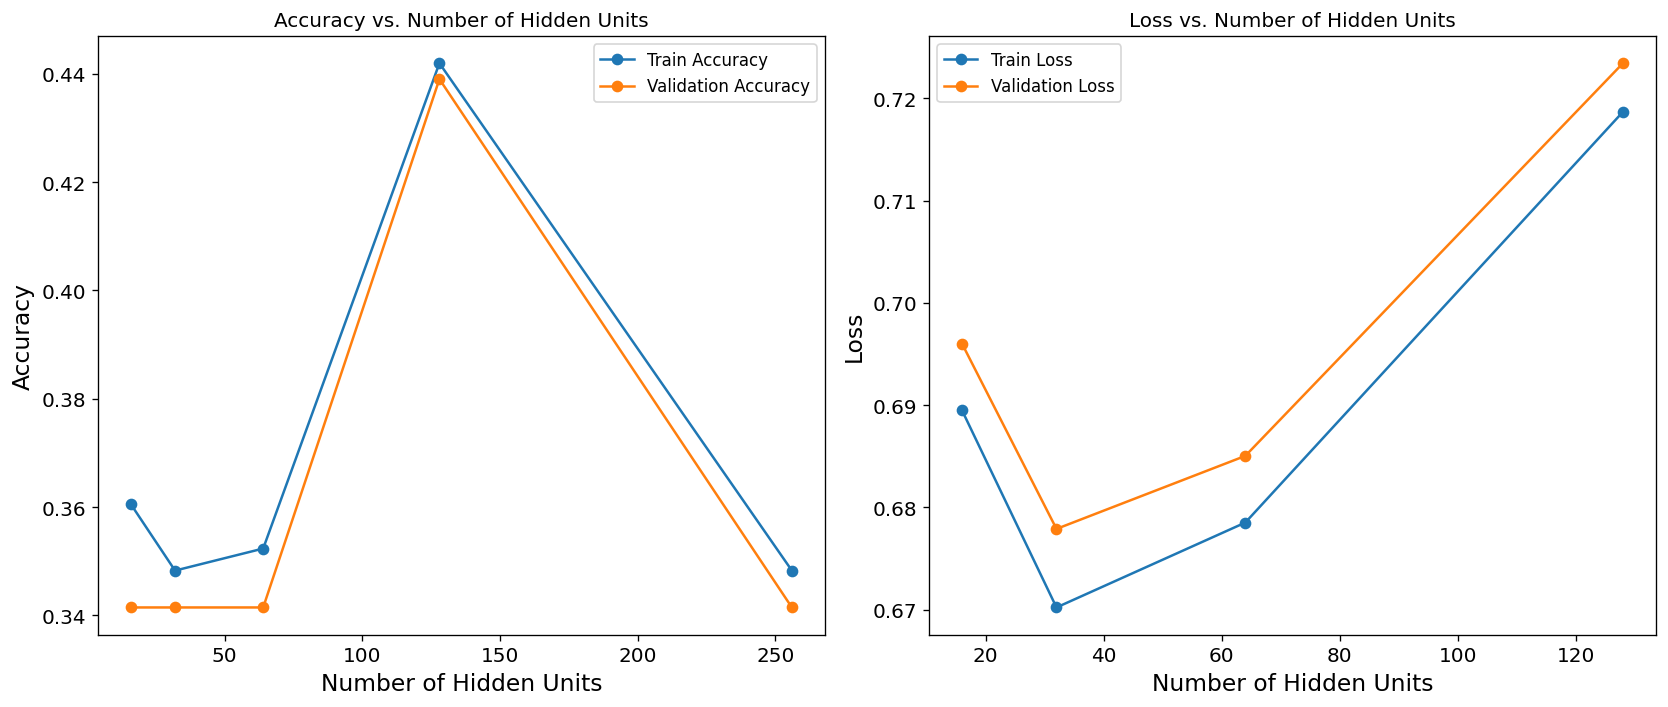



Results Table:
---------------------------------------------------
| Hidden Units | Precision | Recall | Accuracy | Loss  |
---------------------------------------------------
| 16           | 0.6750    | 1.0000 | 0.3415   | 0.6960 |
| 32           | 0.6991    | 0.9753 | 0.3415   | 0.6779 |
| 64           | 0.6957    | 0.9877 | 0.3415   | 0.6850 |
| 128          | 0.6585    | 1.0000 | 0.4390   | 0.7234 |
| 256          | 0.0000    | 0.0000 | 0.3415   | nan   |
---------------------------------------------------


In [209]:
def change_n_hidden_and_plot_metrics(X_train, y_train, X_val, y_val, hidden_units_list):
    X_train = X_train.to_numpy()  # Convert X_train to a NumPy array
    y_train = y_train.to_numpy()  # Convert y_train to a NumPy array
    X_val = X_val.to_numpy()      # Convert X_val to a NumPy array
    y_val = y_val.to_numpy()      # Convert y_val to a NumPy array

    train_accuracies = []
    val_accuracies = []
    train_losses = []
    val_losses = []
    recalls = []
    precisions = []

    for n_hidden in hidden_units_list:
        model = MLP(n_hidden=n_hidden)
        model.fit(X_train, y_train)

        # Calculate training accuracy
        train_accuracy = model.evaluate(X_train, y_train)
        train_loss = model.compute_loss(X_train, y_train)
        
        # Calculate validation accuracy
        val_accuracy = model.evaluate(X_val, y_val)
        val_loss = model.compute_loss(X_val, y_val)

    
        # Append to lists
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        # Predict probabilities on validation set
        y_pred_probs_val = model.predict_prob(X_val)

        # Compute recall and precision
        precision, recall = get_metrics(y_val, y_pred_probs_val)
        recalls.append(recall)
        precisions.append(precision)

    # Create subplots for accuracy and loss
    plt.figure(figsize=(14, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(hidden_units_list, train_accuracies, marker='o', label='Train Accuracy')
    plt.plot(hidden_units_list, val_accuracies, marker='o', label='Validation Accuracy')
    plt.title('Accuracy vs. Number of Hidden Units')
    plt.xlabel('Number of Hidden Units')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(hidden_units_list, train_losses, marker='o', label='Train Loss')
    plt.plot(hidden_units_list, val_losses, marker='o', label='Validation Loss')
    plt.title('Loss vs. Number of Hidden Units')
    plt.xlabel('Number of Hidden Units')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()
    
    # Print results in table format
    print("\n\nResults Table:")
    print("---------------------------------------------------")
    print("| Hidden Units | Precision | Recall | Accuracy | Loss  |")
    print("---------------------------------------------------")
    for i in range(len(hidden_units_list)):
        print(f"| {hidden_units_list[i]:<12} | {precisions[i]:<9.4f} | {recalls[i]:<5.4f} | {val_accuracies[i]:<8.4f} | {val_losses[i]:<5.4f} |")
    print("---------------------------------------------------")

# Example usage
if __name__ == "__main__":
    # Generate or load your training and validation data (X_train, y_train, X_val, y_val)
    # Define a list of hidden units to test
    hidden_units_list = [16, 32, 64, 128, 256]

    change_n_hidden_and_plot_metrics(X_train, y_train, X_val, y_val, hidden_units_list)

In [210]:
best_n_hidden = 32

/var/folders/26/tl_8xc090n32w_q1fvnfh4jh0000gn/T/ipykernel_66391/2092827497.py:23: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/26/tl_8xc090n32w_q1fvnfh4jh0000gn/T/ipykernel_66391/2092827497.py:76: RuntimeWarning: overflow encountered in multiply
  d_hidden_layer = d_output * self.weights_hidden_output * hidden_layer_output * (1 - hidden_layer_output)
/var/folders/26/tl_8xc090n32w_q1fvnfh4jh0000gn/T/ipykernel_66391/2092827497.py:76: RuntimeWarning: invalid value encountered in multiply
  d_hidden_layer = d_output * self.weights_hidden_output * hidden_layer_output * (1 - hidden_layer_output)


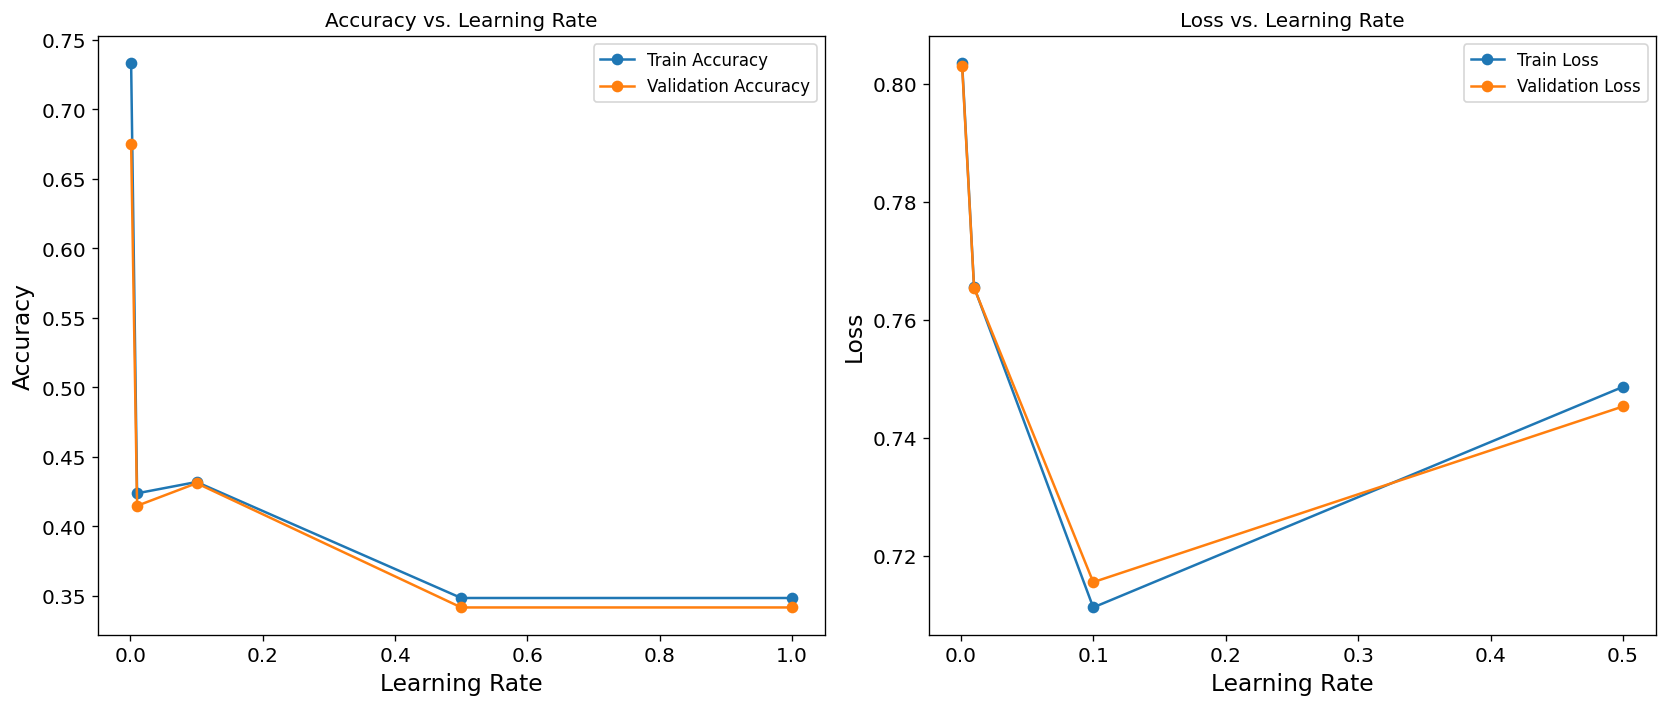



Results Table:
-------------------------------------------------------------
| Learning Rate | Precision | Recall | Accuracy | Loss  |
-------------------------------------------------------------
| 0.0010        | 0.6585    | 1.0000 | 0.6748   | 0.8030 |
| 0.0100        | 0.6585    | 1.0000 | 0.4146   | 0.7654 |
| 0.1000        | 0.6639    | 1.0000 | 0.4309   | 0.7155 |
| 0.5000        | 0.6585    | 1.0000 | 0.3415   | 0.7453 |
| 1.0000        | 0.0000    | 0.0000 | 0.3415   | nan   |
-------------------------------------------------------------


In [214]:
def change_learning_rate_and_plot_metrics(X_train, y_train, X_val, y_val, learning_rates):
    X_train = X_train.to_numpy()  # Convert X_train to a NumPy array
    y_train = y_train.to_numpy()  # Convert y_train to a NumPy array
    X_val = X_val.to_numpy()      # Convert X_val to a NumPy array
    y_val = y_val.to_numpy()      # Convert y_val to a NumPy array
    
    train_accuracies = []
    val_accuracies = []
    train_losses = []
    val_losses = []
    recalls = []
    precisions = []

    for learning_rate in learning_rates_list:
        model = MLP(learning_rate=learning_rate)
        model.fit(X_train, y_train)

        # Calculate training accuracy and loss
        train_accuracy = model.evaluate(X_train, y_train)
        train_loss = model.compute_loss(X_train, y_train)

        # Calculate validation accuracy and loss
        val_accuracy = model.evaluate(X_val, y_val)
        val_loss = model.compute_loss(X_val, y_val)

        # Predict probabilities on validation set
        y_pred_probs_val = model.predict_prob(X_val)

        # Compute recall and precision
        precision, recall = get_metrics(y_val, y_pred_probs_val)
        recalls.append(recall)
        precisions.append(precision)

        # Append accuracies and losses to lists
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

    # Create subplots for accuracy and loss
    plt.figure(figsize=(14, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(learning_rates_list, train_accuracies, marker='o', label='Train Accuracy')
    plt.plot(learning_rates_list, val_accuracies, marker='o', label='Validation Accuracy')
    plt.title('Accuracy vs. Learning Rate')
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(learning_rates_list, train_losses, marker='o', label='Train Loss')
    plt.plot(learning_rates_list, val_losses, marker='o', label='Validation Loss')
    plt.title('Loss vs. Learning Rate')
    plt.xlabel('Learning Rate')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print results in table format
    print("\n\nResults Table:")
    print("-------------------------------------------------------------")
    print("| Learning Rate | Precision | Recall | Accuracy | Loss  |")
    print("-------------------------------------------------------------")
    for i in range(len(learning_rates_list)):
        print(f"| {learning_rates_list[i]:<13.4f} | {precisions[i]:<9.4f} | {recalls[i]:<5.4f} | {val_accuracies[i]:<8.4f} | {val_losses[i]:<5.4f} |")
    print("-------------------------------------------------------------")

# Example usage
if __name__ == "__main__":
    # Generate or load your training and validation data (X_train, y_train, X_val, y_val)
    # Define a list of learning rates to test
    learning_rates_list = [0.001, 0.01, 0.1, 0.5, 1]

    change_learning_rate_and_plot_metrics(X_train, y_train, X_val, y_val, learning_rates_list)

In [215]:
best_learning_rate = 0.1

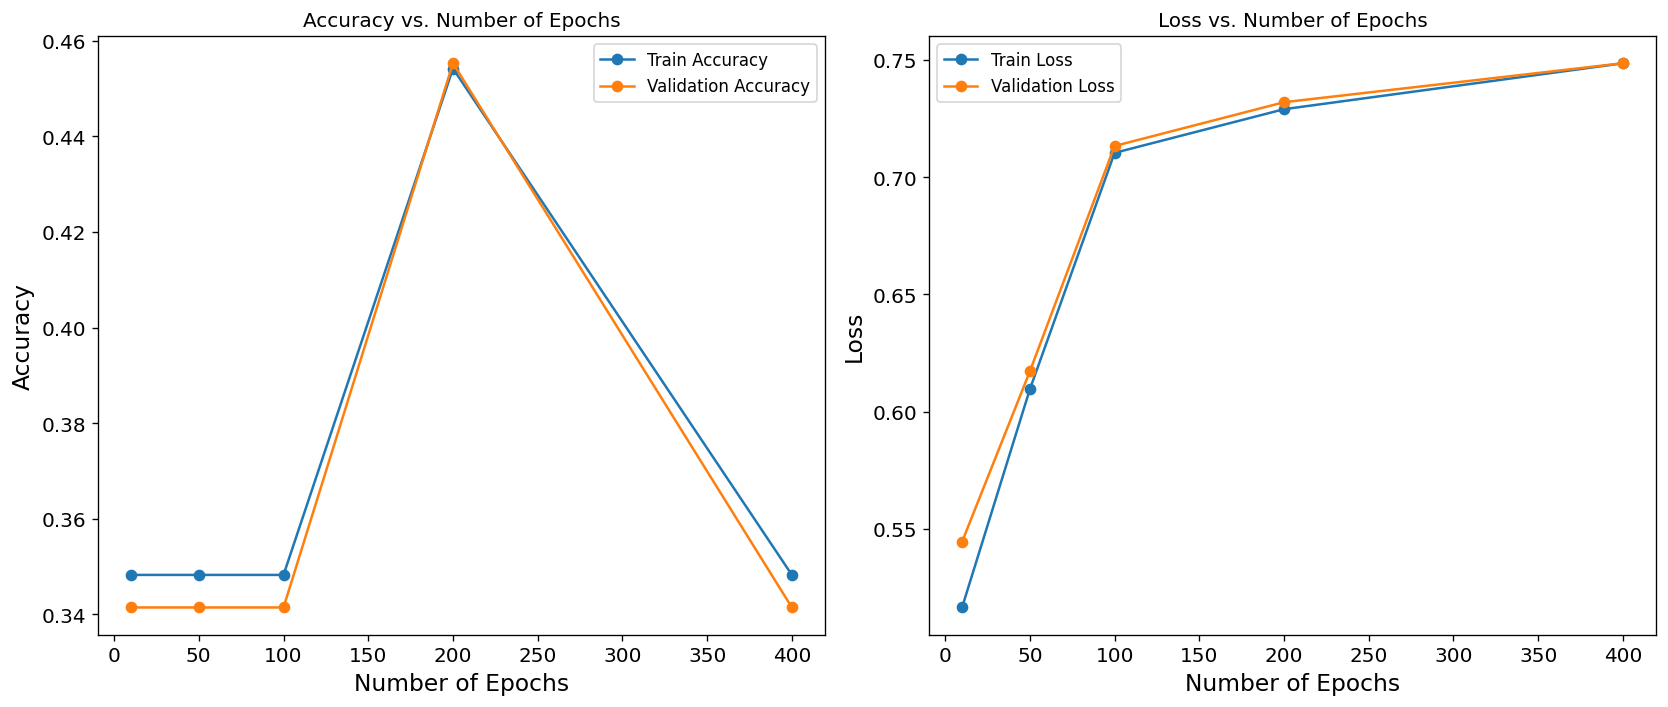



Results Table:
----------------------------------------------------------
| Epochs | Precision | Recall | Accuracy | Loss  |
----------------------------------------------------------
| 10     | 0.0000    | 0.0000 | 0.3415   | 0.5445 |
| 50     | 0.8923    | 0.7160 | 0.3415   | 0.6172 |
| 100    | 0.6585    | 1.0000 | 0.3415   | 0.7133 |
| 200    | 0.6585    | 1.0000 | 0.4553   | 0.7319 |
| 400    | 0.6585    | 1.0000 | 0.3415   | 0.7486 |
----------------------------------------------------------


In [228]:
def change_epochs_and_plot_metrics(X_train, y_train, X_val, y_val, epochs_list):
    X_train = X_train.to_numpy()  # Convert X_train to a NumPy array
    y_train = y_train.to_numpy()  # Convert y_train to a NumPy array
    X_val = X_val.to_numpy()      # Convert X_val to a NumPy array
    y_val = y_val.to_numpy()      # Convert y_val to a NumPy array

    train_accuracies = []
    val_accuracies = []
    train_losses = []
    val_losses = []
    recalls = []
    precisions = []

    for n_epochs in epochs_list:
        model = MLP(n_epochs=n_epochs)
        model.fit(X_train, y_train)

        # Calculate training accuracy and loss
        train_accuracy = model.evaluate(X_train, y_train)
        train_loss = model.compute_loss(X_train, y_train)
        
        # Calculate validation accuracy and loss
        val_accuracy = model.evaluate(X_val, y_val)
        val_loss = model.compute_loss(X_val, y_val)

        # Predict probabilities on validation set
        y_pred_probs_val = model.predict_prob(X_val)
        # Compute recall and precision
        precision, recall = get_metrics(y_val, y_pred_probs_val)
        recalls.append(recall)
        precisions.append(precision)
    
        # Append to lists
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

    # Create subplots for accuracy and loss
    plt.figure(figsize=(14, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_list, train_accuracies, marker='o', label='Train Accuracy')
    plt.plot(epochs_list, val_accuracies, marker='o', label='Validation Accuracy')
    plt.title('Accuracy vs. Number of Epochs')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_list, train_losses, marker='o', label='Train Loss')
    plt.plot(epochs_list, val_losses, marker='o', label='Validation Loss')
    plt.title('Loss vs. Number of Epochs')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print results in table format
    print("\n\nResults Table:")
    print("----------------------------------------------------------")
    print("| Epochs | Precision | Recall | Accuracy | Loss  |")
    print("----------------------------------------------------------")
    for i in range(len(epochs_list)):
        print(f"| {epochs_list[i]:<6} | {precisions[i]:<9.4f} | {recalls[i]:<5.4f} | {val_accuracies[i]:<8.4f} | {val_losses[i]:<5.4f} |")
    print("----------------------------------------------------------")

# Example usage
if __name__ == "__main__":
    # Generate or load your training and validation data (X_train, y_train, X_val, y_val)
    # Define a list of epochs to test
    epochs_list = [10, 50, 100, 200, 400]

    change_epochs_and_plot_metrics(X_train, y_train, X_val, y_val, epochs_list)


In [236]:
best_n_epochs = 50

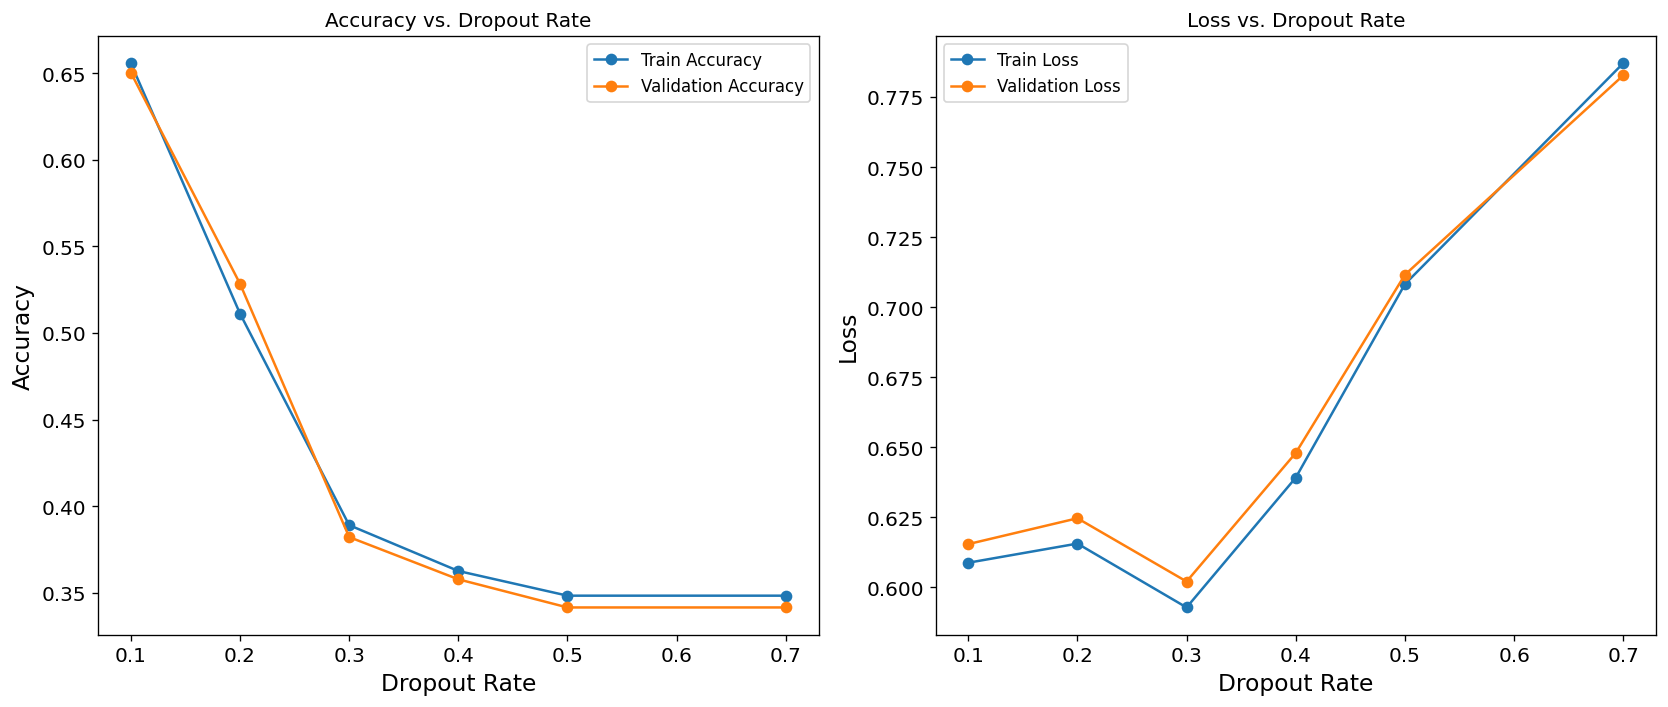



Results Table:
--------------------------------------------------------------
| Dropout Rate | Precision | Recall | Accuracy | Loss  |
--------------------------------------------------------------
| 0.10         | 0.7255    | 0.9136 | 0.6504   | 0.6154 |
| 0.20         | 0.7282    | 0.9259 | 0.5285   | 0.6247 |
| 0.30         | 0.7391    | 0.8395 | 0.3821   | 0.6021 |
| 0.40         | 0.7282    | 0.9259 | 0.3577   | 0.6480 |
| 0.50         | 0.6585    | 1.0000 | 0.3415   | 0.7116 |
| 0.70         | 0.6585    | 1.0000 | 0.3415   | 0.7827 |
--------------------------------------------------------------


In [237]:
def change_dropout_and_plot_metrics(X_train, y_train, X_val, y_val, dropout_rates_list):
    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy()
    X_val = X_val.to_numpy()
    y_val = y_val.to_numpy()

    train_accuracies = []
    val_accuracies = []
    train_losses = []
    val_losses = []
    recalls = []
    precisions = []

    for dropout_rate in dropout_rates_list:
        model = MLP(dropout_rate=dropout_rate)
        model.fit(X_train, y_train)

        train_accuracy = model.evaluate(X_train, y_train)
        train_loss = model.compute_loss(X_train, y_train)
        
        val_accuracy = model.evaluate(X_val, y_val)
        val_loss = model.compute_loss(X_val, y_val)

        y_pred_probs_val = model.predict_prob(X_val)
        precision, recall = get_metrics(y_val, y_pred_probs_val)

        # Append results to lists
        train_accuracies.append(train_accuracy)
        train_losses.append(train_loss)
        val_accuracies.append(val_accuracy)
        val_losses.append(val_loss)
        recalls.append(recall)
        precisions.append(precision)

    # Plotting
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(dropout_rates_list, train_accuracies, marker='o', label='Train Accuracy')
    plt.plot(dropout_rates_list, val_accuracies, marker='o', label='Validation Accuracy')
    plt.title('Accuracy vs. Dropout Rate')
    plt.xlabel('Dropout Rate')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(dropout_rates_list, train_losses, marker='o', label='Train Loss')
    plt.plot(dropout_rates_list, val_losses, marker='o', label='Validation Loss')
    plt.title('Loss vs. Dropout Rate')
    plt.xlabel('Dropout Rate')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print results table
    print("\n\nResults Table:")
    print("--------------------------------------------------------------")
    print("| Dropout Rate | Precision | Recall | Accuracy | Loss  |")
    print("--------------------------------------------------------------")
    for i in range(len(dropout_rates_list)):
        print(f"| {dropout_rates_list[i]:<12.2f} | {precisions[i]:<9.4f} | {recalls[i]:<5.4f} | {val_accuracies[i]:<8.4f} | {val_losses[i]:<5.4f} |")
    print("--------------------------------------------------------------")

# Example usage
if __name__ == "__main__":
    dropout_rates_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.7]
    change_dropout_and_plot_metrics(X_train, y_train, X_val, y_val, dropout_rates_list)


In [61]:
best_dropout_rate = 0.3

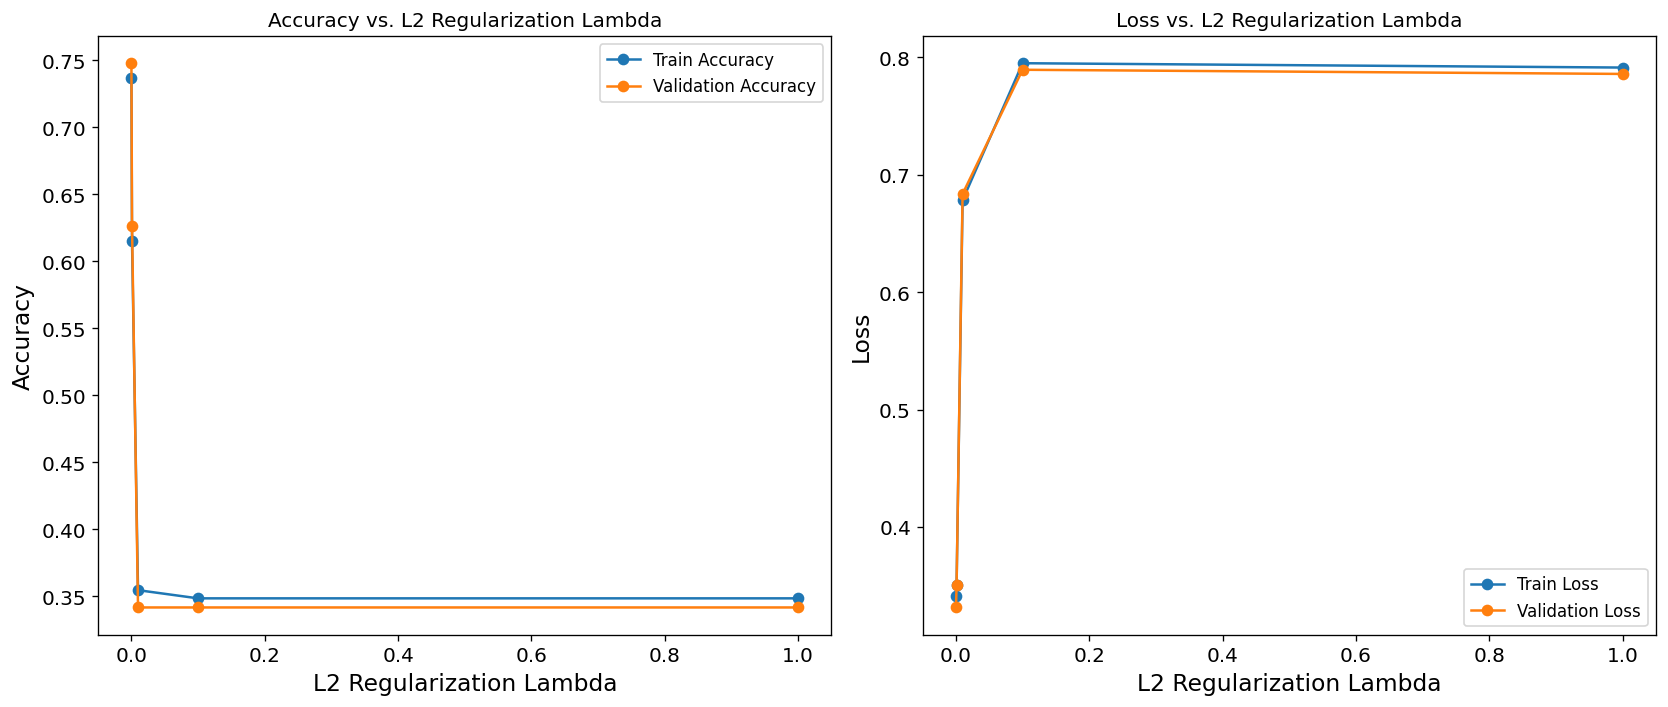



Results Table:
----------------------------------------------------------------------------------
| L2 Lambda    | Precision | Recall  | Accuracy | Loss  |
----------------------------------------------------------------------------------
| 0.00010    | 0.8046    | 0.8642  | 0.7480   | 0.3314 |
| 0.00100    | 0.8451    | 0.7407  | 0.6260   | 0.3506 |
| 0.01000    | 0.6957    | 0.9877  | 0.3415   | 0.6836 |
| 0.10000    | 0.6585    | 1.0000  | 0.3415   | 0.7894 |
| 1.00000    | 0.6585    | 1.0000  | 0.3415   | 0.7859 |
----------------------------------------------------------------------------------


In [109]:
def change_l2_lambda_and_plot_metrics(X_train, y_train, X_val, y_val, lambda_list):
    X_train = X_train.to_numpy()  # Convert X_train to a NumPy array
    y_train = y_train.to_numpy()  # Convert y_train to a NumPy array
    X_val = X_val.to_numpy()      # Convert X_val to a NumPy array
    y_val = y_val.to_numpy()      # Convert y_val to a NumPy array

    train_accuracies = []
    val_accuracies = []
    train_losses = []
    val_losses = []
    recalls = []
    precisions = []

    for l2_lambda in lambda_list:
        model = MLP(l2_lambda=l2_lambda)
        model.fit(X_train, y_train)

        # Calculate training accuracy and loss
        train_accuracy = model.evaluate(X_train, y_train)
        train_loss = model.compute_loss(X_train, y_train)

        # Calculate validation accuracy and loss
        val_accuracy = model.evaluate(X_val, y_val)
        val_loss = model.compute_loss(X_val, y_val)

        # Predict probabilities on validation set
        y_pred_probs_val = model.predict_prob(X_val)

        # Compute recall and precision
        precision, recall = get_metrics(y_val, y_pred_probs_val)

        # Append to lists
        train_accuracies.append(train_accuracy)
        train_losses.append(train_loss)
        val_accuracies.append(val_accuracy)
        val_losses.append(val_loss)
        recalls.append(recall)
        precisions.append(precision)

    # Create subplots for accuracy and loss
    plt.figure(figsize=(14, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(lambda_list, train_accuracies, marker='o', label='Train Accuracy')
    plt.plot(lambda_list, val_accuracies, marker='o', label='Validation Accuracy')
    plt.title('Accuracy vs. L2 Regularization Lambda')
    plt.xlabel('L2 Regularization Lambda')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(lambda_list, train_losses, marker='o', label='Train Loss')
    plt.plot(lambda_list, val_losses, marker='o', label='Validation Loss')
    plt.title('Loss vs. L2 Regularization Lambda')
    plt.xlabel('L2 Regularization Lambda')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print results in table format
    print("\n\nResults Table:")
    print("----------------------------------------------------------------------------------")
    print("| L2 Lambda    | Precision | Recall  | Accuracy | Loss  |")
    print("----------------------------------------------------------------------------------")
    for i in range(len(lambda_list)):
        print(f"| {lambda_list[i]:<10.5f} | {precisions[i]:<9.4f} | {recalls[i]:<7.4f} | {val_accuracies[i]:<8.4f} | {val_losses[i]:<5.4f} |")
    print("----------------------------------------------------------------------------------")

# Example usage
if __name__ == "__main__":
    lambda_list = [0.0001, 0.001, 0.01, 0.1, 1.0]
    change_l2_lambda_and_plot_metrics(X_train, y_train, X_val, y_val, lambda_list)


In [240]:
best_l2_lambda = 0.0001

/var/folders/26/tl_8xc090n32w_q1fvnfh4jh0000gn/T/ipykernel_66391/3678367002.py:76: RuntimeWarning: overflow encountered in multiply
  d_hidden_layer = d_output * self.weights_hidden_output * hidden_layer_output * (1 - hidden_layer_output)


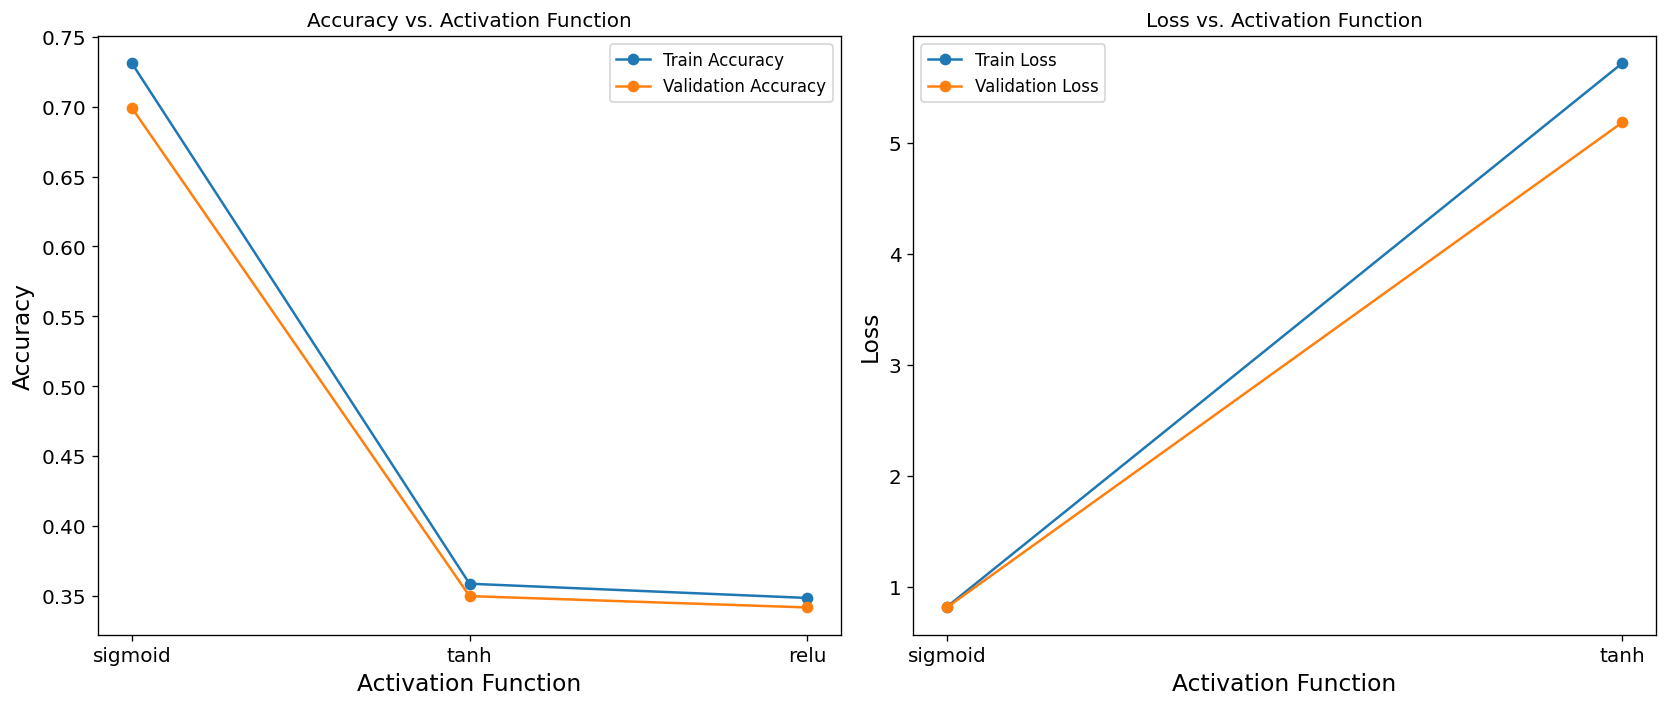



Results Table:
-------------------------------------------------------------
| Activation  | Precision | Recall | Accuracy | Loss  |
-------------------------------------------------------------
| sigmoid    | 0.6585    | 1.0000 | 0.6992   | 0.8120 |
| tanh       | 0.0000    | 0.0000 | 0.3496   | 5.1849 |
| relu       | 0.0000    | 0.0000 | 0.3415   | nan   |
-------------------------------------------------------------


In [254]:
def change_activation_function_and_plot_metrics(X_train, y_train, X_val, y_val, activation_functions_list):
    X_train = X_train.to_numpy()  # Convert X_train to a NumPy array
    y_train = y_train.to_numpy()  # Convert y_train to a NumPy array
    X_val = X_val.to_numpy()      # Convert X_val to a NumPy array
    y_val = y_val.to_numpy()      # Convert y_val to a NumPy array

    train_accuracies = []
    val_accuracies = []
    train_losses = []
    val_losses = []
    recalls = []
    precisions = []

    for activation_function in activation_functions_list:
        model = MLP(activation_function=activation_function)
        model.fit(X_train, y_train)

        # Calculate training accuracy
        train_accuracy = model.evaluate(X_train, y_train)
        train_loss = model.compute_loss(X_train, y_train)
        
        # Calculate validation accuracy
        val_accuracy = model.evaluate(X_val, y_val)
        val_loss = model.compute_loss(X_val, y_val)

        # Predict probabilities on validation set
        y_pred_probs_val = model.predict_prob(X_val)

        # Compute recall and precision
        precision, recall = get_metrics(y_val, y_pred_probs_val)

        # Append to lists
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        recalls.append(recall)
        precisions.append(precision)
        
    # Create subplots for accuracy and loss
    plt.figure(figsize=(14, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(activation_functions_list, train_accuracies, marker='o', label='Train Accuracy')
    plt.plot(activation_functions_list, val_accuracies, marker='o', label='Validation Accuracy')
    plt.title('Accuracy vs. Activation Function')
    plt.xlabel('Activation Function')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(activation_functions_list, train_losses, marker='o', label='Train Loss')
    plt.plot(activation_functions_list, val_losses, marker='o', label='Validation Loss')
    plt.title('Loss vs. Activation Function')
    plt.xlabel('Activation Function')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


    # Print results in table format
    print("\n\nResults Table:")
    print("-------------------------------------------------------------")
    print("| Activation  | Precision | Recall | Accuracy | Loss  |")
    print("-------------------------------------------------------------")
    for i in range(len(activation_functions_list)):
        print(f"| {activation_functions_list[i]:<10} | {precisions[i]:<9.4f} | {recalls[i]:<5.4f} | {val_accuracies[i]:<8.4f} | {val_losses[i]:<5.4f} |")
    print("-------------------------------------------------------------")

# Example usage
if __name__ == "__main__":
    activation_functions_list = ['sigmoid', 'tanh', 'relu']
    change_activation_function_and_plot_metrics(X_train, y_train, X_val, y_val, activation_functions_list)


In [144]:
best_activation_function = "tanh"

In [143]:
final_mlp = MLP(learning_rate=best_learning_rate, n_epochs=best_n_epochs, n_hidden=best_n_hidden, 
                dropout_rate=best_dropout_rate, l2_lambda=best_l2_lambda, activation_function=best_activation_function)
final_mlp.fit(X_test_array, y_test_binary)

# Compute accuracy on the test data
final_accuracy = final_mlp.evaluate(X_test_array, y_test_binary)


# Predict probabilities on the test data
y_pred_probs_test = final_mlp.predict_prob(X_test_array)

# Compute precision and recall
final_precision, final_recall = get_metrics(y_test_binary, y_pred_probs_test)

print(f"Final Accuracy on Test Data: {final_accuracy:.4f}")
print(f"Final Precision on Test Data: {final_precision:.4f}")
print(f"Final Recall on Test Data: {final_recall:.4f}")


Final Accuracy on Test Data: 0.7662
Final Precision on Test Data: 0.8961
Final Recall on Test Data: 0.6970
